# Part 0: Dataloader and Visualizations

In [1]:
import numpy as np
from PIL import Image
import scipy.io
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import wandb

from voc_dataset import VOCDataset
from utils import *

USE_WANDB = False

## Q0.1: Editing the Dataloader
The first part of the assignment involves editing the dataloader so that we can access bounding-box proposals as well as the ground-truth bounding boxes. The ground truth bounding box can be accessed through the VOC Dataset annotations itself and we have completed this part for you in the starter code. 

Unsupervised bounding box proposals are obtained through methods such as [Selective Search](https://ivi.fnwi.uva.nl/isis/publications/2013/UijlingsIJCV2013/UijlingsIJCV2013.pdf). Since Selective Search is slow to run on each image, we have pre-computed the bounding box proposals for you (you downloaded this in the data preparation step).

Your task is to change the dataloader to obtain the proposed bounding boxes for each image. Feel free to experiment with the data in the files to figure out the number of proposals per image, their scores, etc. Returning a dictionary would be convenient here. For the bounding boxes, using the relative positions is usually a better idea since they are invariant to changes in the size of the image.

In [2]:
dataset = VOCDataset(
    'trainval', 
    top_n=10, 
    data_dir='/ocean/projects/asc170022p/shg121/PhD/CMU-Visual-Learning-Recognition/Hw1-object-localization-main/data/VOCdevkit/VOC2007/'
)

**Q0.1**: Load the image corresponding to index 2020 and print the GT labels associated with it.

**Hint**: items at a particular index can be accesed by usual indexing notation (dataset[idx])

[18]
train


(-0.5, 223.5, 223.5, -0.5)

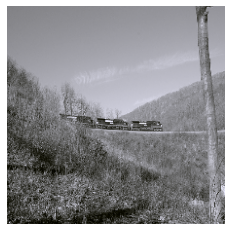

In [3]:
import matplotlib.pyplot as plt
CLASS_NAMES = [
        'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
        'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]
# TODO: get the image information from index 2020
idx = 2020
item_2020 = dataset[idx]
# TODO: load the GT information corresponding to index 2020.
img_2020 = tensor_to_PIL(item_2020['image'])
gt_labels = item_2020['gt_classes']
gt_boxes = item_2020['gt_boxes']
original_image = tensor_to_PIL(item_2020['image'])
print(gt_labels)
print(CLASS_NAMES[gt_labels[0]])
plt.imshow(img_2020)
plt.axis('off')

## Q0.2 and Q0.3: Wandb Logging
First, let's initialize a Weights and Biases project. 

In [4]:
USE_WANDB = True
if USE_WANDB:
    wandb.init(project="vlr-hw1", reinit=True)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shg121. Use `wandb login --relogin` to force relogin


**Q0.2**: Complete this block for overlaying the ground truth box on an image.

**Hint**: convert the image tensor to a PIL image and plot it (check `utils.py` for helper functions). You can use [this](https://docs.wandb.ai/library/log) as a reference for logging syntax.

In [5]:
class_id_to_label = dict(enumerate(dataset.CLASS_NAMES))
img = wandb.Image(original_image, boxes={
    "predictions": {
        "box_data": get_box_data(gt_labels, gt_boxes),
        "class_labels": class_id_to_label,
    },
})

# TODO: log the GT bounding box
wandb.log({"Ground Truth BBs": img})

**Q0.3**: Visualize the top 10 bounding proposals corresponding to index 2020.

**Hint**: Check the `get_box_data` function in `utils.py` and understand how it is being used. 

In [6]:
# TODO: plot top ten proposals (of bounding boxes)

roi_2020 = item_2020['rois']
# proposals = np.squeeze(np.array(proposals),axis=1)
roi_2020_np = np.array(roi_2020)

img = wandb.Image(original_image, boxes={
    "predictions": {
        "box_data": get_box_data(range(len(roi_2020_np)), roi_2020_np),
        "class_labels": class_id_to_label,
    },
})

wandb.log({"ROI BBs": img})

In [20]:
arr = [{'a': 1, 'b': 2}, {'a': 3, 'b': 4}]
list(arr)

[{'a': 1, 'b': 2}, {'a': 3, 'b': 4}]